# Building the CNN

In [1]:
#importing keras libraries and package
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os

Using TensorFlow backend.


In [2]:
#initializing CNN
cnn_classifier= Sequential()
#convolution layer
cnn_classifier.add(Convolution2D(32, (3,3), input_shape = (64,64, 3), activation= "relu"))
#maxpooling
cnn_classifier.add(MaxPooling2D(pool_size= (2,2)))

#adding second conv layer
cnn_classifier.add(Convolution2D(32, (3,3), activation= "relu"))
cnn_classifier.add(MaxPooling2D(pool_size= (2,2)))

#Flattening
cnn_classifier.add(Flatten())
#full connection
cnn_classifier.add(Dense(128, activation= "relu"))
cnn_classifier.add(Dense(1, activation= "sigmoid"))

In [3]:
#compiling the CNN
cnn_classifier.compile(optimizer= "adam", loss= "binary_crossentropy", metrics= ["accuracy"])

# Image Preprocessing

In [4]:
#image augmentation
# keras preprocessing documentation link: https://keras.io/api/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
#applying image augmentation on training data
training_set = train_datagen.flow_from_directory('Part 2 - Convolutional Neural Networks (CNN)\\Section 8 - Building a CNN\\dataset\\training_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#applying image augmentation on test data
test_set = test_datagen.flow_from_directory('Part 2 - Convolutional Neural Networks (CNN)\\Section 8 - Building a CNN\\dataset\\test_set',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')
#fitting the model
cnn_classifier.fit(training_set,
                    steps_per_epoch=8000,
                    epochs=5,
                    validation_data=test_set,
                    validation_steps=2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
8000/8000 [==============================] - 2655s 332ms/step - loss: 0.3387 - accuracy: 0.8427 - val_loss: 0.4590 - val_accuracy: 0.8093
Epoch 2/5
8000/8000 [==============================] - 3023s 378ms/step - loss: 0.0926 - accuracy: 0.9656 - val_loss: 0.7998 - val_accuracy: 0.8035
Epoch 3/5
8000/8000 [==============================] - 3117s 390ms/step - loss: 0.0482 - accuracy: 0.9829 - val_loss: 0.5449 - val_accuracy: 0.7898
Epoch 4/5
8000/8000 [==============================] - 1512s 189ms/step - loss: 0.0360 - accuracy: 0.9875 - val_loss: 0.6067 - val_accuracy: 0.8043
Epoch 5/5
8000/8000 [==============================] - 1582s 198ms/step - loss: 0.0290 - accuracy: 0.9901 - val_loss: 1.0342 - val_accuracy: 0.7935


# Prediction on new image

In [9]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

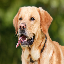

In [14]:
import numpy as np
from keras.preprocessing import image
test_image1= image.load_img("Part 2 - Convolutional Neural Networks (CNN)\\Section 8 - Building a CNN\\dataset\\single_prediction\\cat_or_dog_1.jpg", target_size= (64, 64))
test_image_array= image.img_to_array(test_image1)
test_image_array= np.expand_dims(test_image_array, axis=0)
result= cnn_classifier.predict(test_image_array)
if result[0][0]== 1:
    prediction= "dog"
else:
    prediction= "cat"
test_image1

In [15]:
prediction

'dog'

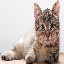

In [16]:
test_image2= image.load_img("Part 2 - Convolutional Neural Networks (CNN)\\Section 8 - Building a CNN\\dataset\\single_prediction\\cat_or_dog_2.jpg", target_size= (64, 64))
test_image_array= image.img_to_array(test_image2)
test_image_array= np.expand_dims(test_image_array, axis=0)
result= cnn_classifier.predict(test_image_array)
if result[0][0]== 1:
    prediction= "dog"
else:
    prediction= "cat"
test_image2

In [17]:
prediction

'cat'

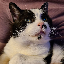

In [22]:
test_image3= image.load_img("Part 2 - Convolutional Neural Networks (CNN)\\Section 8 - Building a CNN\\dataset\\single_prediction\\cat_or_dog_3.jpg", target_size= (64, 64))
test_image_array= image.img_to_array(test_image3)
test_image_array= np.expand_dims(test_image_array, axis=0)
result= cnn_classifier.predict(test_image_array)
if result[0][0]== 1:
    prediction= "dog"
else:
    prediction= "cat"
test_image3

In [23]:
prediction

'dog'

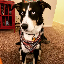

In [24]:
test_image4= image.load_img("Part 2 - Convolutional Neural Networks (CNN)\\Section 8 - Building a CNN\\dataset\\single_prediction\\cat_or_dog_4.jpg", target_size= (64, 64))
test_image_array= image.img_to_array(test_image3)
test_image_array= np.expand_dims(test_image_array, axis=0)
result= cnn_classifier.predict(test_image_array)
if result[0][0]== 1:
    prediction= "dog"
else:
    prediction= "cat"
test_image4

In [25]:
prediction

'dog'